<a href="https://colab.research.google.com/github/viniciusbedeschi/TCC/blob/main/TCC_Estruturacao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação dos Pacotes Necéssarios

In [ ]:
#Pacote para escrever um arquivo CSV no Google Drive
!pip install gspread
!pip install gspread oauth2client
!pip install gspread_dataframe
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from sklearn.neighbors import LocalOutlierFactor


#Conectando o notebook com o Drive
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import auth
import gspread

#Importando função para calcular a distância entre as cidades com base nas suas coordenadas geográficas
from geopy.distance import great_circle


Mounted at /content/gdrive


#Configurando o maximo de linhas a  ser exibido no display

In [ ]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_colum', 50)


# Criação dos Data Frames a partir dos arquivos csv

In [ ]:
df_orders = pd.read_csv('/content/gdrive/MyDrive/Base de dados/olist_orders_dataset.csv')
display(df_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Convertendo as colunas de data de string para date type

In [ ]:
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
# df_orders['Mes_Pedido'] = df_orders['order_approved_at'].apply(lambda x: x.month)
df_orders['Mes_Pedido'] = df_orders['order_approved_at'].dt.strftime('%B')

Criando as colunas calculadas de tempo de entrega real

In [ ]:
df_orders['tempo_entrega_real'] = df_orders['order_delivered_customer_date'] - df_orders['order_delivered_carrier_date']
df_orders['tempo_entrega_days_real'] = (df_orders['order_delivered_customer_date'] - df_orders['order_delivered_carrier_date'])/ np.timedelta64(1, 'D')
display(df_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,6 days 01:30:13,6.062650
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,12 days 00:56:45,12.039410
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,9 days 04:16:29,9.178113
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,9 days 10:48:43,9.450498
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,1 days 22:30:28,1.937824
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,March,7 days 03:49:58,7.159699
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,February,20 days 18:15:14,20.760579
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,August,23 days 14:31:51,23.605451
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,13 days 07:57:51,13.331840


Criando as colunas calculadas de tempo de entrega estimado

In [ ]:
df_orders['tempo_entrega_estimado'] = df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_carrier_date']
df_orders['tempo_entrega_days_estimado'] = (df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_carrier_date'])/ np.timedelta64(1, 'D')
display(df_orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,6 days 01:30:13,6.062650,13 days 04:05:00,13.170139
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,12 days 00:56:45,12.039410,17 days 09:29:00,17.395139
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,9 days 04:16:29,9.178113,26 days 10:10:00,26.423611
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,9 days 10:48:43,9.450498,22 days 10:20:01,22.430567
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,1 days 22:30:28,1.937824,11 days 04:13:26,11.175995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,March,7 days 03:49:58,7.159699,17 days 12:41:57,17.529132
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,February,20 days 18:15:14,20.760579,22 days 00:37:18,22.025903
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,August,23 days 14:31:51,23.605451,29 days 03:07:34,29.130255
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,13 days 07:57:51,13.331840,33 days 08:24:57,33.350660


In [ ]:
media_real = df_orders['tempo_entrega_real'].mean()

print(media_real)

9 days 07:55:59.254148743


In [ ]:
media_estimada = df_orders['tempo_entrega_estimado'].mean()

print(media_estimada)

20 days 12:29:03.566241373


In [ ]:
df_orders_items = pd.read_csv('/content/gdrive/MyDrive/Base de dados/olist_order_items_dataset.csv')
display(df_orders_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
df1 = df_orders.merge(df_orders_items, left_on = 'order_id', right_on='order_id')
display(df1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,6 days 01:30:13,6.062650,13 days 04:05:00,13.170139,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,12 days 00:56:45,12.039410,17 days 09:29:00,17.395139,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,9 days 04:16:29,9.178113,26 days 10:10:00,26.423611,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,9 days 10:48:43,9.450498,22 days 10:20:01,22.430567,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,1 days 22:30:28,1.937824,11 days 04:13:26,11.175995,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,February,20 days 18:15:14,20.760579,22 days 00:37:18,22.025903,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,August,23 days 14:31:51,23.605451,29 days 03:07:34,29.130255,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,13 days 07:57:51,13.331840,33 days 08:24:57,33.350660,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,13 days 07:57:51,13.331840,33 days 08:24:57,33.350660,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [ ]:
df_orders_review = pd.read_csv('/content/gdrive/MyDrive/Base de dados/olist_order_reviews_dataset.csv')
display(df_orders_review)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
df2 = df1.merge(df_orders_review, left_on = 'order_id', right_on='order_id')
display(df2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,6 days 01:30:13,6.062650,13 days 04:05:00,13.170139,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,12 days 00:56:45,12.039410,17 days 09:29:00,17.395139,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,9 days 04:16:29,9.178113,26 days 10:10:00,26.423611,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,9 days 10:48:43,9.450498,22 days 10:20:01,22.430567,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,1 days 22:30:28,1.937824,11 days 04:13:26,11.175995,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,February,20 days 18:15:14,20.760579,22 days 00:37:18,22.025903,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
112368,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,August,23 days 14:31:51,23.605451,29 days 03:07:34,29.130255,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
112369,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,January,13 days 07:57:51,13.331840,33 days 08:24:57,33.350660,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,8ab6855b9f

In [ ]:
df_products = pd.read_csv('/content/gdrive/MyDrive/Base de dados/olist_products_dataset.csv')
display(df_products)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
df3 = df2.merge(df_products, left_on = 'product_id', right_on='product_id')
display(df3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,6 days 01:30:13,6.062650,13 days 04:05:00,13.170139,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,August,0 days 23:16:10,0.969560,10 days 08:31:27,10.355174,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,August,3 days 00:54:18,3.037708,10 days 06:24:17,10.266863,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,October,11 days 01:16:13,11.052928,16 days 07:11:14,16.299468,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,12 days 00:56:45,12.039410,17 days 09:29:00,17.395139,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,August,4 days 22:53:38,4.953912,12 days 07:17:09,12.303576,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,f5453b3d33358ed459eb4312392b96a8,4,NaN,NaN,2017-08-24 00:00:00,2017-08-25 11:38:19,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112368,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,August,4 days 22:53:38,4.953912,12 days 07:17:09,12.303576,2,0df37da38a30a713453b03053d60d3f7,218d46

In [ ]:
df_customers = pd.read_csv('/content/gdrive/MyDrive/Base de dados/olist_customers_dataset.csv')
display(df_customers)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df4 = df3.merge(df_customers, left_on = 'customer_id', right_on='customer_id')
display(df4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,6 days 01:30:13,6.062650,13 days 04:05:00,13.170139,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,August,0 days 23:16:10,0.969560,10 days 08:31:27,10.355174,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,August,3 days 00:54:18,3.037708,10 days 06:24:17,10.266863,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,October,11 days 01:16:13,11.052928,16 days 07:11:14,16.299468,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,12 days 00:56:45,12.039410,17 days 09:29:00,17.395139,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,August,4 days 22:53:38,4.953912,12 days 07:17:09,12.303576,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,f5453b3d33358ed459eb4312392b96a8,4,NaN,NaN,2017-08-24 00:00

In [ ]:
df_sellers = pd.read_csv('/content/gdrive/MyDrive/Base de dados/olist_sellers_dataset.csv')
display(df_sellers)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
df_final = df4.merge(df_sellers, left_on = 'seller_id', right_on='seller_id')
display(df_final)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,6 days 01:30:13,6.062650,13 days 04:05:00,13.170139,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,August,0 days 23:16:10,0.969560,10 days 08:31:27,10.355174,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,August,3 days 00:54:18,3.037708,10 days 06:24:17,10.266863,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,October,11 days 01:16:13,11.052928,16 days 07:11:14,16.299468,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,9350,maua,SP
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23,August,5 days 05:11:01,5.215984,11 days 10:07:25,11.421817,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,b8238c6515192f8129081e17dc57d169,5,NaN,"custo beneficio, simples de usar e rápido",2017-08-17 00:00:00,2017-08-21 12:43:27,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,July,5 days 00:32:57,5.022882,15 days 09:26:00,15.393056,1,31ec3a565e06de4bdf9d2a511b8

In [ ]:
df_final = df_final.where(df_final['order_status'] == 'delivered')

df_final = df_final.dropna()

display(df_final)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
53,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,12 days 00:56:45,12.039410,17 days 09:29:00,17.395139,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,31570.0,belo horizonte,SP
54,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP,31570.0,belo horizonte,SP
56,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33820.0,ribeirao das neves,MG,31570.0,belo horizonte,SP
59,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,August,6 days 03:37:22,6.150949,18 days 08:39:00,18.360417,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,8892abc02a527ef7535564ecfc0d0133,5.0,super recomendo,"entrega no prazo, amei",2018-08-29 00:00:00,2018-09-11 12:15:59,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,958ac7760e5484df1496ba5833ab6117,89117.0,gaspar,SC,31570.0,belo horizonte,SP
60,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,August,6 days 03:37:22,6.150949,18 days 08:39:00,18.360417,2.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,8892abc02a527ef7535564ecfc0d0133,5.0,super recomendo,"entrega no prazo, amei",2018-08-29 00:00:00,2018-09-11 12:15:59,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,958ac7760e5484df1496ba5833ab6117,89117.0,gaspar,SC,31570.0,belo horizonte,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112296,83262941cdb645f93d2446a666571eb4,305c72d87ab363c4d33fc055a547702a,delivered,2018-08-07 00:33:24,2018-08-07 00:45:12,2018-08-07 08:15:00,2018-08-20 12:43:40,2018-09-12,August,13 days 04:28:40,13.186574,35 day

In [ ]:
df_data_mes = df_final

df_data_mes['order_delivered_carrier_date_month'] = df_data_mes['order_delivered_carrier_date'].dt.strftime('%m')

df_data_mes = pd.DataFrame(df_data_mes.groupby('order_delivered_carrier_date_month')['tempo_entrega_days_real'].count())

display(df_data_mes)

,tempo_entrega_days_real
order_delivered_carrier_date_month,
01,5
02,11
03,61
04,1458
05,2661
06,2357
07,2155
08,2465
09,2


<Axes: xlabel='order_delivered_carrier_date_month'>

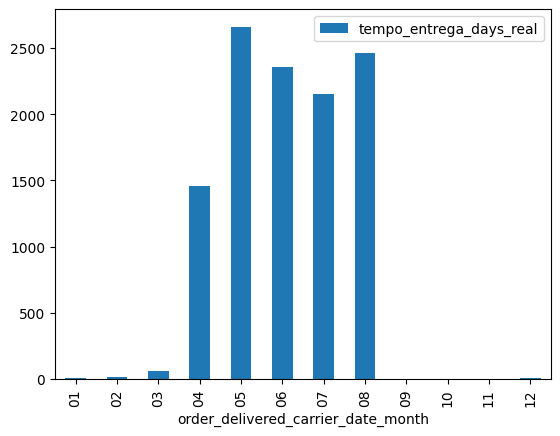

In [ ]:
df_data_mes.plot.bar()

#Filtrando a Região Sudeste

In [ ]:
sudeste = ['SP', 'RJ', 'MG', 'ES']

In [ ]:
df_sudeste = df_final.where(df_final['customer_state'].isin(sudeste)).dropna()
display(df_sudeste)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,order_delivered_carrier_date_month
54,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08
56,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33820.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,07
63,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33821.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,08
64,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4ee553fa4da24e46926241e4a67812b0,6719.0,cotia,SP,31570.0,belo horizonte,SP,07
72,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-08 16:44:28,116.9,18.92,8e3caf3f5fc6e80bd9b973078bc59b8b,4.0,Bom,Chegou antes do prazo previsto.,2018-08-10 00:00:00,2018-08-10 23:39:06,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,e936b5a035e2b0505863a9aa31f32280,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112287,c69e7e591d11462c6a11215e52c4329b,1c1e1532dcfb2dba978d8f91fef9484f,delivered,2018-06-17 22:05:56,2018-06-17 22:32:30,2018-06-

#Criando a coluna com a distância entre o vendedor e o comprador

##Inserindo a latitude e longitude das cidades

Tabela com as informações de lat e lon

In [ ]:
df_geolocation = pd.read_csv('/content/gdrive/MyDrive/Base de dados/olist_geolocation_dataset.csv')
df_geolocation = df_geolocation.drop_duplicates(subset='geolocation_zip_code_prefix')
df_geolocation = df_geolocation.where(df_geolocation['geolocation_state'].isin(sudeste)).dropna()
display(df_geolocation)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037.0,-23.545621,-46.639292,sao paulo,SP
1,1046.0,-23.546081,-46.644820,sao paulo,SP
3,1041.0,-23.544392,-46.639499,sao paulo,SP
4,1035.0,-23.541578,-46.641607,sao paulo,SP
5,1012.0,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
667730,39931.0,-16.145358,-40.296888,avaí do jacinto,MG
667744,39995.0,-15.743164,-41.335455,divisa alegre,MG
667772,39923.0,-29.489062,-51.968384,estrela de jordânia,MG
667777,39955.0,-16.519932,-40.444475,itapiru,MG


##Adicionando informações comprador



In [ ]:
columns_to_select = ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
df_geolocation_customer = df_geolocation[columns_to_select]
df_geolocation_customer = df_geolocation_customer.rename(columns = {'geolocation_zip_code_prefix': 'customer_zip_code_prefix', 'geolocation_lat': 'geolocation_lat_customer', 'geolocation_lng': 'geolocation_lng_customer'})
display(df_geolocation_customer)

,customer_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer
0,1037.0,-23.545621,-46.639292
1,1046.0,-23.546081,-46.644820
3,1041.0,-23.544392,-46.639499
4,1035.0,-23.541578,-46.641607
5,1012.0,-23.547762,-46.635361
...,...,...,...
667730,39931.0,-16.145358,-40.296888
667744,39995.0,-15.743164,-41.335455
667772,39923.0,-29.489062,-51.968384
667777,39955.0,-16.519932,-40.444475


In [ ]:
df_dist = df_sudeste.merge(df_geolocation_customer, left_on = 'customer_zip_code_prefix', right_on='customer_zip_code_prefix', how='left')
display(df_dist)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,order_delivered_carrier_date_month,geolocation_lat_customer,geolocation_lng_customer
0,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08,-20.317321,-47.780781
1,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33820.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,07,-19.771425,-44.128587
2,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33821.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,08,-19.758647,-44.162556
3,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4ee553fa4da24e46926241e4a67812b0,6719.0,cotia,SP,31570.0,belo horizonte,SP,07,-23.624444,-46.948836
4,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-08 16:44:28,116.9,18.92,8e3caf3f5fc6e80bd9b973078bc59b8b,4.0,Bom,Chegou antes do prazo previsto.,2018-08-10 00:00:00,2018-08-10 23:39:06,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,e936b5a035e2b0505863a9aa31f32280,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08,-20.317321,-47.780781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

##Adicionando informações vendedor

In [ ]:
columns_to_select = ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
df_geolocation_seller = df_geolocation[columns_to_select]
df_geolocation_seller = df_geolocation_seller.rename(columns = {'geolocation_zip_code_prefix': 'seller_zip_code_prefix', 'geolocation_lat': 'geolocation_lat_seller', 'geolocation_lng': 'geolocation_lng_seller'})
display(df_geolocation_seller)

,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller
0,1037.0,-23.545621,-46.639292
1,1046.0,-23.546081,-46.644820
3,1041.0,-23.544392,-46.639499
4,1035.0,-23.541578,-46.641607
5,1012.0,-23.547762,-46.635361
...,...,...,...
667730,39931.0,-16.145358,-40.296888
667744,39995.0,-15.743164,-41.335455
667772,39923.0,-29.489062,-51.968384
667777,39955.0,-16.519932,-40.444475


In [ ]:
df_dist = df_dist.merge(df_geolocation_seller, left_on = 'seller_zip_code_prefix', right_on='seller_zip_code_prefix', how='left')
display(df_dist)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,order_delivered_carrier_date_month,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller
0,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08,-20.317321,-47.780781,-19.810119,-43.984727
1,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33820.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,07,-19.771425,-44.128587,-19.810119,-43.984727
2,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33821.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,08,-19.758647,-44.162556,-19.810119,-43.984727
3,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4ee553fa4da24e46926241e4a67812b0,6719.0,cotia,SP,31570.0,belo horizonte,SP,07,-23.624444,-46.948836,-19.810119,-43.984727
4,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-08 16:44:28,116.9,18.92,8e3caf3f5fc6e80bd9b973078bc59b8b,4.0,Bom,Chegou antes do prazo previsto.,2018-08-10 00:00:00,2018-08-10 23:39:06,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,e936b5a035e2b0505863a9aa31f32280,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08,-20.317321,-47.780781,-19.810119

##Criamdo a Coluna da Distância Entre Comprador e Vendedor

In [ ]:
df_dist = df_dist.dropna()
df_dist['Distance'] = [great_circle((row['geolocation_lat_customer'], row['geolocation_lng_customer']), (row['geolocation_lat_seller'], row['geolocation_lng_seller'])).km for index, row in df_dist.iterrows()]

display(df_dist)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,order_delivered_carrier_date_month,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,Distance
0,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08,-20.317321,-47.780781,-19.810119,-43.984727,400.466657
1,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33820.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,07,-19.771425,-44.128587,-19.810119,-43.984727,15.654501
2,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33821.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,08,-19.758647,-44.162556,-19.810119,-43.984727,19.466840
3,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4ee553fa4da24e46926241e4a67812b0,6719.0,cotia,SP,31570.0,belo horizonte,SP,07,-23.624444,-46.948836,-19.810119,-43.984727,523.062446
4,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-08 16:44:28,116.9,18.92,8e3caf3f5fc6e80bd9b973078bc59b8b,4.0,Bom,Chegou antes do prazo previsto.,2018-08-10 00:00:00,2018-08-10 23:39:06,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,e936b5a035e2b0505863a9aa31f32280,14500.0,ituverava,SP,31570.0,be

#Agrupando por data

In [ ]:
df_dist["dia_da_semana"] = df_dist["order_approved_at"].dt.strftime("%A")
df_dist["Dia_da_Semana"] = df_dist["order_approved_at"].dt.weekday
display(df_dist)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,order_delivered_carrier_date_month,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,Distance,dia_da_semana,Dia_da_Semana
0,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08,-20.317321,-47.780781,-19.810119,-43.984727,400.466657,Thursday,3
1,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33820.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,07,-19.771425,-44.128587,-19.810119,-43.984727,15.654501,Wednesday,2
2,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33821.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,08,-19.758647,-44.162556,-19.810119,-43.984727,19.466840,Tuesday,1
3,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4ee553fa4da24e46926241e4a67812b0,6719.0,cotia,SP,31570.0,belo horizonte,SP,07,-23.624444,-46.948836,-19.810119,-43.984727,523.062446,Friday,4
4,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-08 16:44:28,116.9,18.92,8e3caf3f5fc6e80bd9b973078bc59b8b,4.0,Bom,Chegou antes do prazo previsto.,2018-08-10 00:00:00,2018-08-10 23:39:06,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0

In [ ]:
df_semana = df_dist
df_semana = df_semana.rename(columns={'tempo_entrega_days_real': 'Media_do_Tempo_de_Entrega_em_Dias'})
df_semana = pd.DataFrame(df_semana.groupby('Dia_da_Semana')['Media_do_Tempo_de_Entrega_em_Dias'].mean())

display(df_semana)

,Media_do_Tempo_de_Entrega_em_Dias
Dia_da_Semana,
0,5.007939
1,5.475578
2,5.788042
3,5.463916
4,5.898450
5,5.427438
6,5.477637


<Axes: xlabel='Dia_da_Semana'>

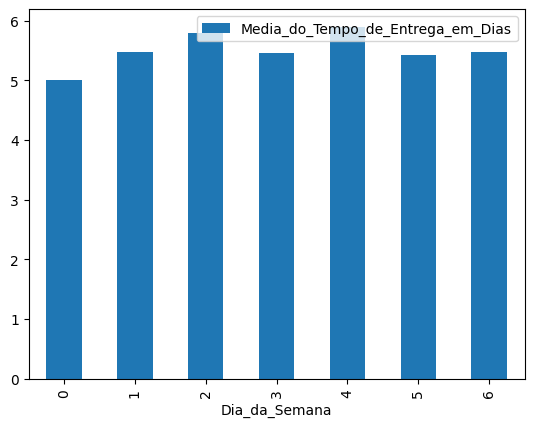

In [ ]:
df_semana.plot.bar()

In [ ]:
df_data_mes = df_dist


df_data_mes = pd.DataFrame(df_data_mes.groupby('Mes_Pedido')['tempo_entrega_days_real'].mean())

display(df_data_mes)

,tempo_entrega_days_real
Mes_Pedido,
April,7.663520
August,4.005007
December,2.148206
February,13.689354
January,17.111186
July,4.247521
June,4.811653
March,27.350007
May,6.583779


In [ ]:
df_data_mes = df_dist

df_data_mes['Mes_de_Aprovacao_do_Pedido'] = df_data_mes['order_approved_at'].dt.strftime('%m')
df_data_mes = df_data_mes.rename(columns={'tempo_entrega_days_real': 'Media_do_Tempo_de_Entrega_em_Dias'})
df_data_mes = pd.DataFrame(df_data_mes.groupby('Mes_de_Aprovacao_do_Pedido')['Media_do_Tempo_de_Entrega_em_Dias'].mean())

display(df_data_mes)

,Media_do_Tempo_de_Entrega_em_Dias
Mes_de_Aprovacao_do_Pedido,
01,17.111186
02,13.689354
03,27.350007
04,7.663520
05,6.583779
06,4.811653
07,4.247521
08,4.005007
09,6.894850


<Axes: xlabel='Mes_de_Aprovacao_do_Pedido'>

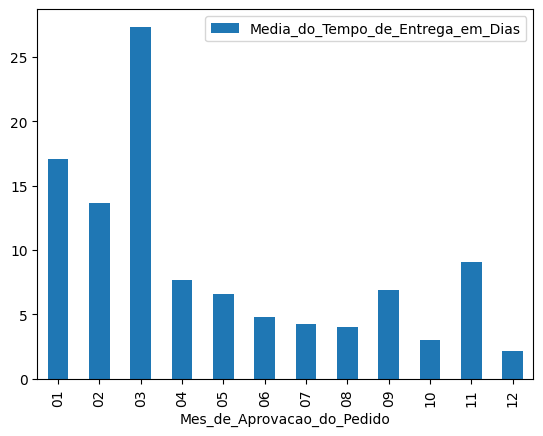

In [ ]:
df_data_mes.plot.bar()

Volume de dados por mês

In [ ]:
df_data_mes = df_dist

df_data_mes['Mes_de_Aprovacao_do_Pedido'] = df_data_mes['order_approved_at'].dt.strftime('%m')
df_data_mes = df_data_mes.rename(columns={'tempo_entrega_days_real': 'Volume_de_Dados'})
df_data_mes = pd.DataFrame(df_data_mes.groupby('Mes_de_Aprovacao_do_Pedido')['Volume_de_Dados'].count())

display(df_data_mes)

,Volume_de_Dados
Mes_de_Aprovacao_do_Pedido,
01,2
02,11
03,44
04,804
05,1698
06,1428
07,1247
08,1375
09,1


<Axes: xlabel='Mes_de_Aprovacao_do_Pedido'>

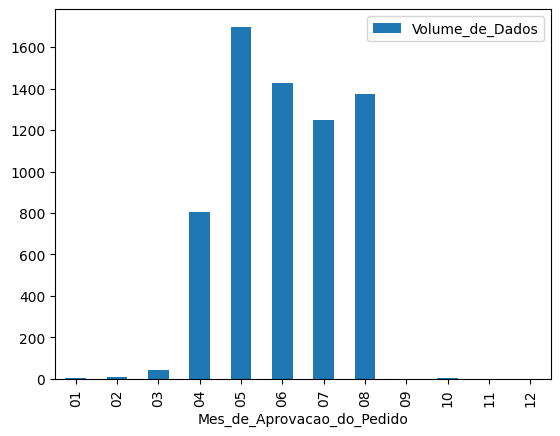

In [ ]:
df_data_mes.plot.bar()

In [ ]:
df_data_mes = df_dist


df_data_mes = pd.DataFrame(df_data_mes.groupby('Mes_Pedido')['order_id'].count())

display(df_data_mes)

,order_id
Mes_Pedido,
April,804
August,1375
December,1
February,11
January,2
July,1247
June,1428
March,44
May,1698


<Axes: xlabel='Mes_Pedido'>

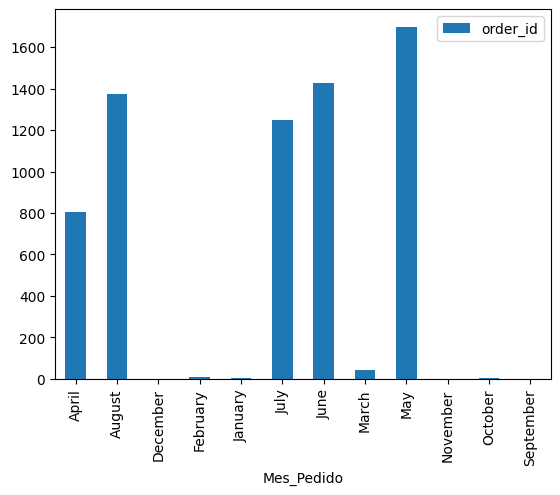

In [ ]:
df_data_mes.plot.bar()

In [ ]:
# df_grouped = df_dist.groupby("dia_da_semana").agg({"tempo_entrega_days_real": "mean"}).reset_index()

# sns.barplot(x="dia_da_semana", y="tempo_entrega_days_real", data=df_grouped)
# plt.xlabel("Dia da semana")
# plt.ylabel("Tempo de entrega médio (dias)")
# plt.title("Tempo de entrega por dia da semana")

# plt.show()

#Agrupandos os Produtos

In [ ]:
# df_prod = np.unique(df_dist['product_category_name'])

# display(df_prod)

In [ ]:
def group_products(row):
    if row['product_category_name'] in ['alimentos', 'alimentos_bebidas']:
        return 'Alimentos e bebidas perecíveis'
    elif row['product_category_name'] in ['cama_mesa_banho', 'moveis_decoracao', 'moveis_quarto', 'moveis_sala', 'portateis_casa_forno_e_cafe']:
        if row['product_weight_g'] > 3000:
            return 'Produtos grandes e pesados'
        else:
            return 'Produtos pequenos e leves'
    elif row['product_category_name'] in ['bebes', 'beleza_saude', 'perfumaria']:
        return 'Produtos de higiene pessoal e cuidados com a saúde'
    elif row['product_category_name'] in ['brinquedos', 'livros_importados', 'livros_interesse_geral', 'livros_tecnicos', 'musica', 'dvds_blu_ray']:
        return 'Livros e mídias'
    elif row['product_category_name'] in ['telefonia', 'telefonia_fixa', 'pcs', 'tablets_impressao_imagem', 'audio', 'consoles_games', 'eletronicos', 'informatica_acessorios']:
        return 'Produtos eletrônicos e de informática'
    elif row['product_category_name'] in ['automotivo', 'construcao_ferramentas_construcao', 'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca']:
        return 'Produtos de construção e automotivos'
    elif row['product_category_name'] in ['esporte_lazer', 'artigos_de_festas', 'artigos_de_natal', 'instrumentos_musicais', 'cine_foto', 'fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina', 'fashion_underwear_e_moda_praia', 'malas_acessorios', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_escritorio', 'sinalizacao_e_seguranca', 'utilidades_domesticas', 'casa_conforto', 'casa_conforto_2', 'agro_industria_e_comercio', 'industria_comercio_e_negocios']:
        return 'Outros produtos'
    else:
        return 'Categoria não definida'


In [ ]:
# def Agg_Prod (row):
#    if row['product_category_name'] == 'moveis_decoracao' :
#       return 'Moveis'
#    if row['product_category_name'] == 'moveis_escritorio' :
#       return 'Moveis'
#    if row['product_category_name'] == 'moveis_quarto' :
#       return 'Moveis'
#    if row['product_category_name'] == 'moveis_sala' :
#       return 'Moveis'
#    if row['product_category_name'] == 'moveis_cozinha_area_de_servico_jantar_e_jardim' :
#       return 'Moveis'
#    if row['product_category_name'] == 'moveis_colchao_e-estofado' :
#       return 'Moveis'
#    if row['product_category_name'] == 'utilidades_domesticas' :
#       return 'Casa'
#    if row['product_category_name'] == 'casa_conforto' :
#       return 'Casa'
#    if row['product_category_name'] == 'casa_conforto_2' :
#       return 'Casa'
#    if row['product_category_name'] == 'casa_construcao' :
#       return 'Casa'
#    if row['product_category_name'] == 'utilidades_domesticas' :
#       return 'Casa'
#    if row['product_category_name'] == 'utilidades_domesticas' :
#       return 'Casa'
#    if row['product_category_name'] == 'utilidades_domesticas' :
#       return 'Casa'
#    if row['product_category_name'] == 'utilidades_domesticas' :
#       return 'Casa'

#    return 'Other'

In [ ]:
# def Agg_Prod(row):
#     if row['product_category_name'] in ['alimentos', 'alimentos_bebidas', 'bebidas']:
#         return 'Alimentos_e_bebidas'
#     elif row['product_category_name'] in ['artigos_de_festas', 'artigos_de_natal', 'cama_mesa_banho', 'casa_conforto', 'casa_conforto_2', 'casa_construcao', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_decoracao', 'moveis_escritorio', 'moveis_quarto', 'moveis_sala', 'utilidades_domesticas']:
#         return 'Casa_e_decoracao'
#     elif row['product_category_name'] in ['audio', 'consoles_games', 'dvds_blu_ray', 'eletronicos', 'pcs', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa']:
#         return 'Eletronicos'
#     elif row['product_category_name'] in ['esporte_lazer', 'instrumentos_musicais', 'musica']:
#         return 'Esportes_e_lazer'
#     elif row['product_category_name'] in ['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina', 'fashion_underwear_e_moda_praia', 'malas_acessorios', 'perfumaria', 'relogios_presentes']:
#         return 'Moda_e_acessorios'
#     elif row['product_category_name'] in ['beleza_saude', 'fraldas_higiene', 'pet_shop']:
#         return 'Saude_e_beleza'
#     elif row['product_category_name'] == 'automotivo':
#         return 'Setor_automotivo'
#     elif row['product_category_name'] in ['agro_industria_e_comercio', 'industria_comercio_e_negocios', 'climatizacao', 'construcao_ferramentas_construcao', 'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca', 'sinalizacao_e_seguranca']:
#         return 'Setor_industrial'
#     else:
#         return 'Outros'


In [ ]:
df_dist['Categoria_Produto'] = df_dist.apply (lambda row: group_products(row), axis=1)

display(df_dist)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,order_delivered_carrier_date_month,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,Distance,dia_da_semana,Dia_da_Semana,Mes_de_Aprovacao_do_Pedido,Categoria_Produto
0,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8b8028d453a01986b48c4271cc341475,14500.0,ituverava,SP,31570.0,belo horizonte,SP,08,-20.317321,-47.780781,-19.810119,-43.984727,400.466657,Thursday,3,08,Produtos de higiene pessoal e cuidados com a s...
1,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33820.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,07,-19.771425,-44.128587,-19.810119,-43.984727,15.654501,Wednesday,2,07,Produtos de higiene pessoal e cuidados com a s...
2,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3edcab192482e9871c17b34cf98c3996,33821.0,ribeirao das neves,MG,31570.0,belo horizonte,SP,08,-19.758647,-44.162556,-19.810119,-43.984727,19.466840,Tuesday,1,08,Produtos de higiene pessoal e cuidados com a s...
3,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4ee553fa4da24e46926241e4a67812b0,6719.0,cotia,SP,31570.0,belo horizonte,SP,07,-23.624444,-46.948836,-19.810119,-43.984727,523.062446,Friday,4,07,Produtos de higiene pessoal e cuidados com a s...
4,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333

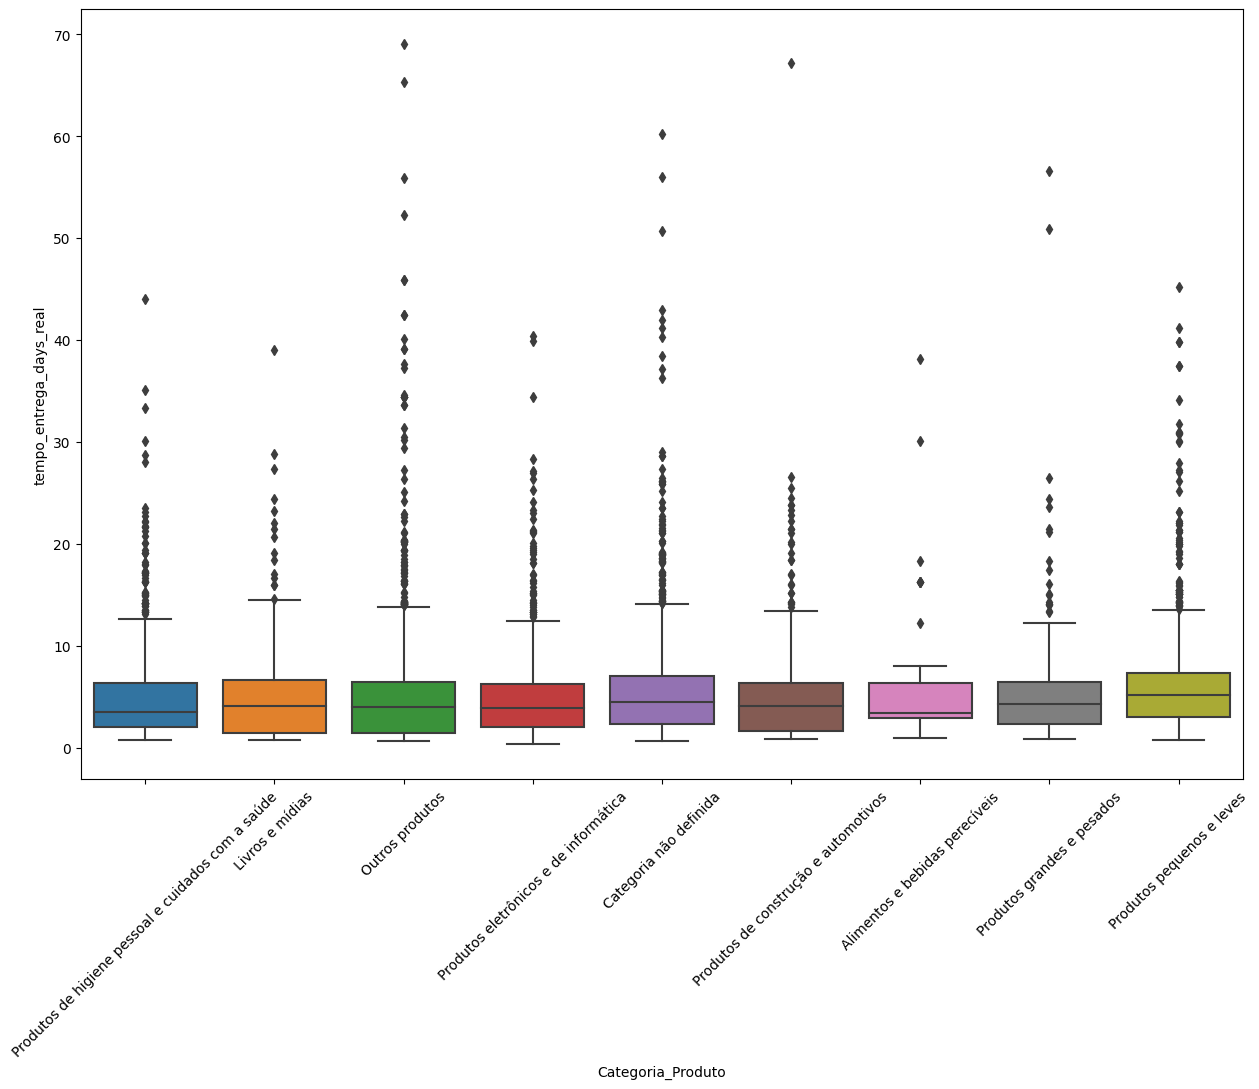

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x="Categoria_Produto", y="tempo_entrega_days_real", data=df_dist)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

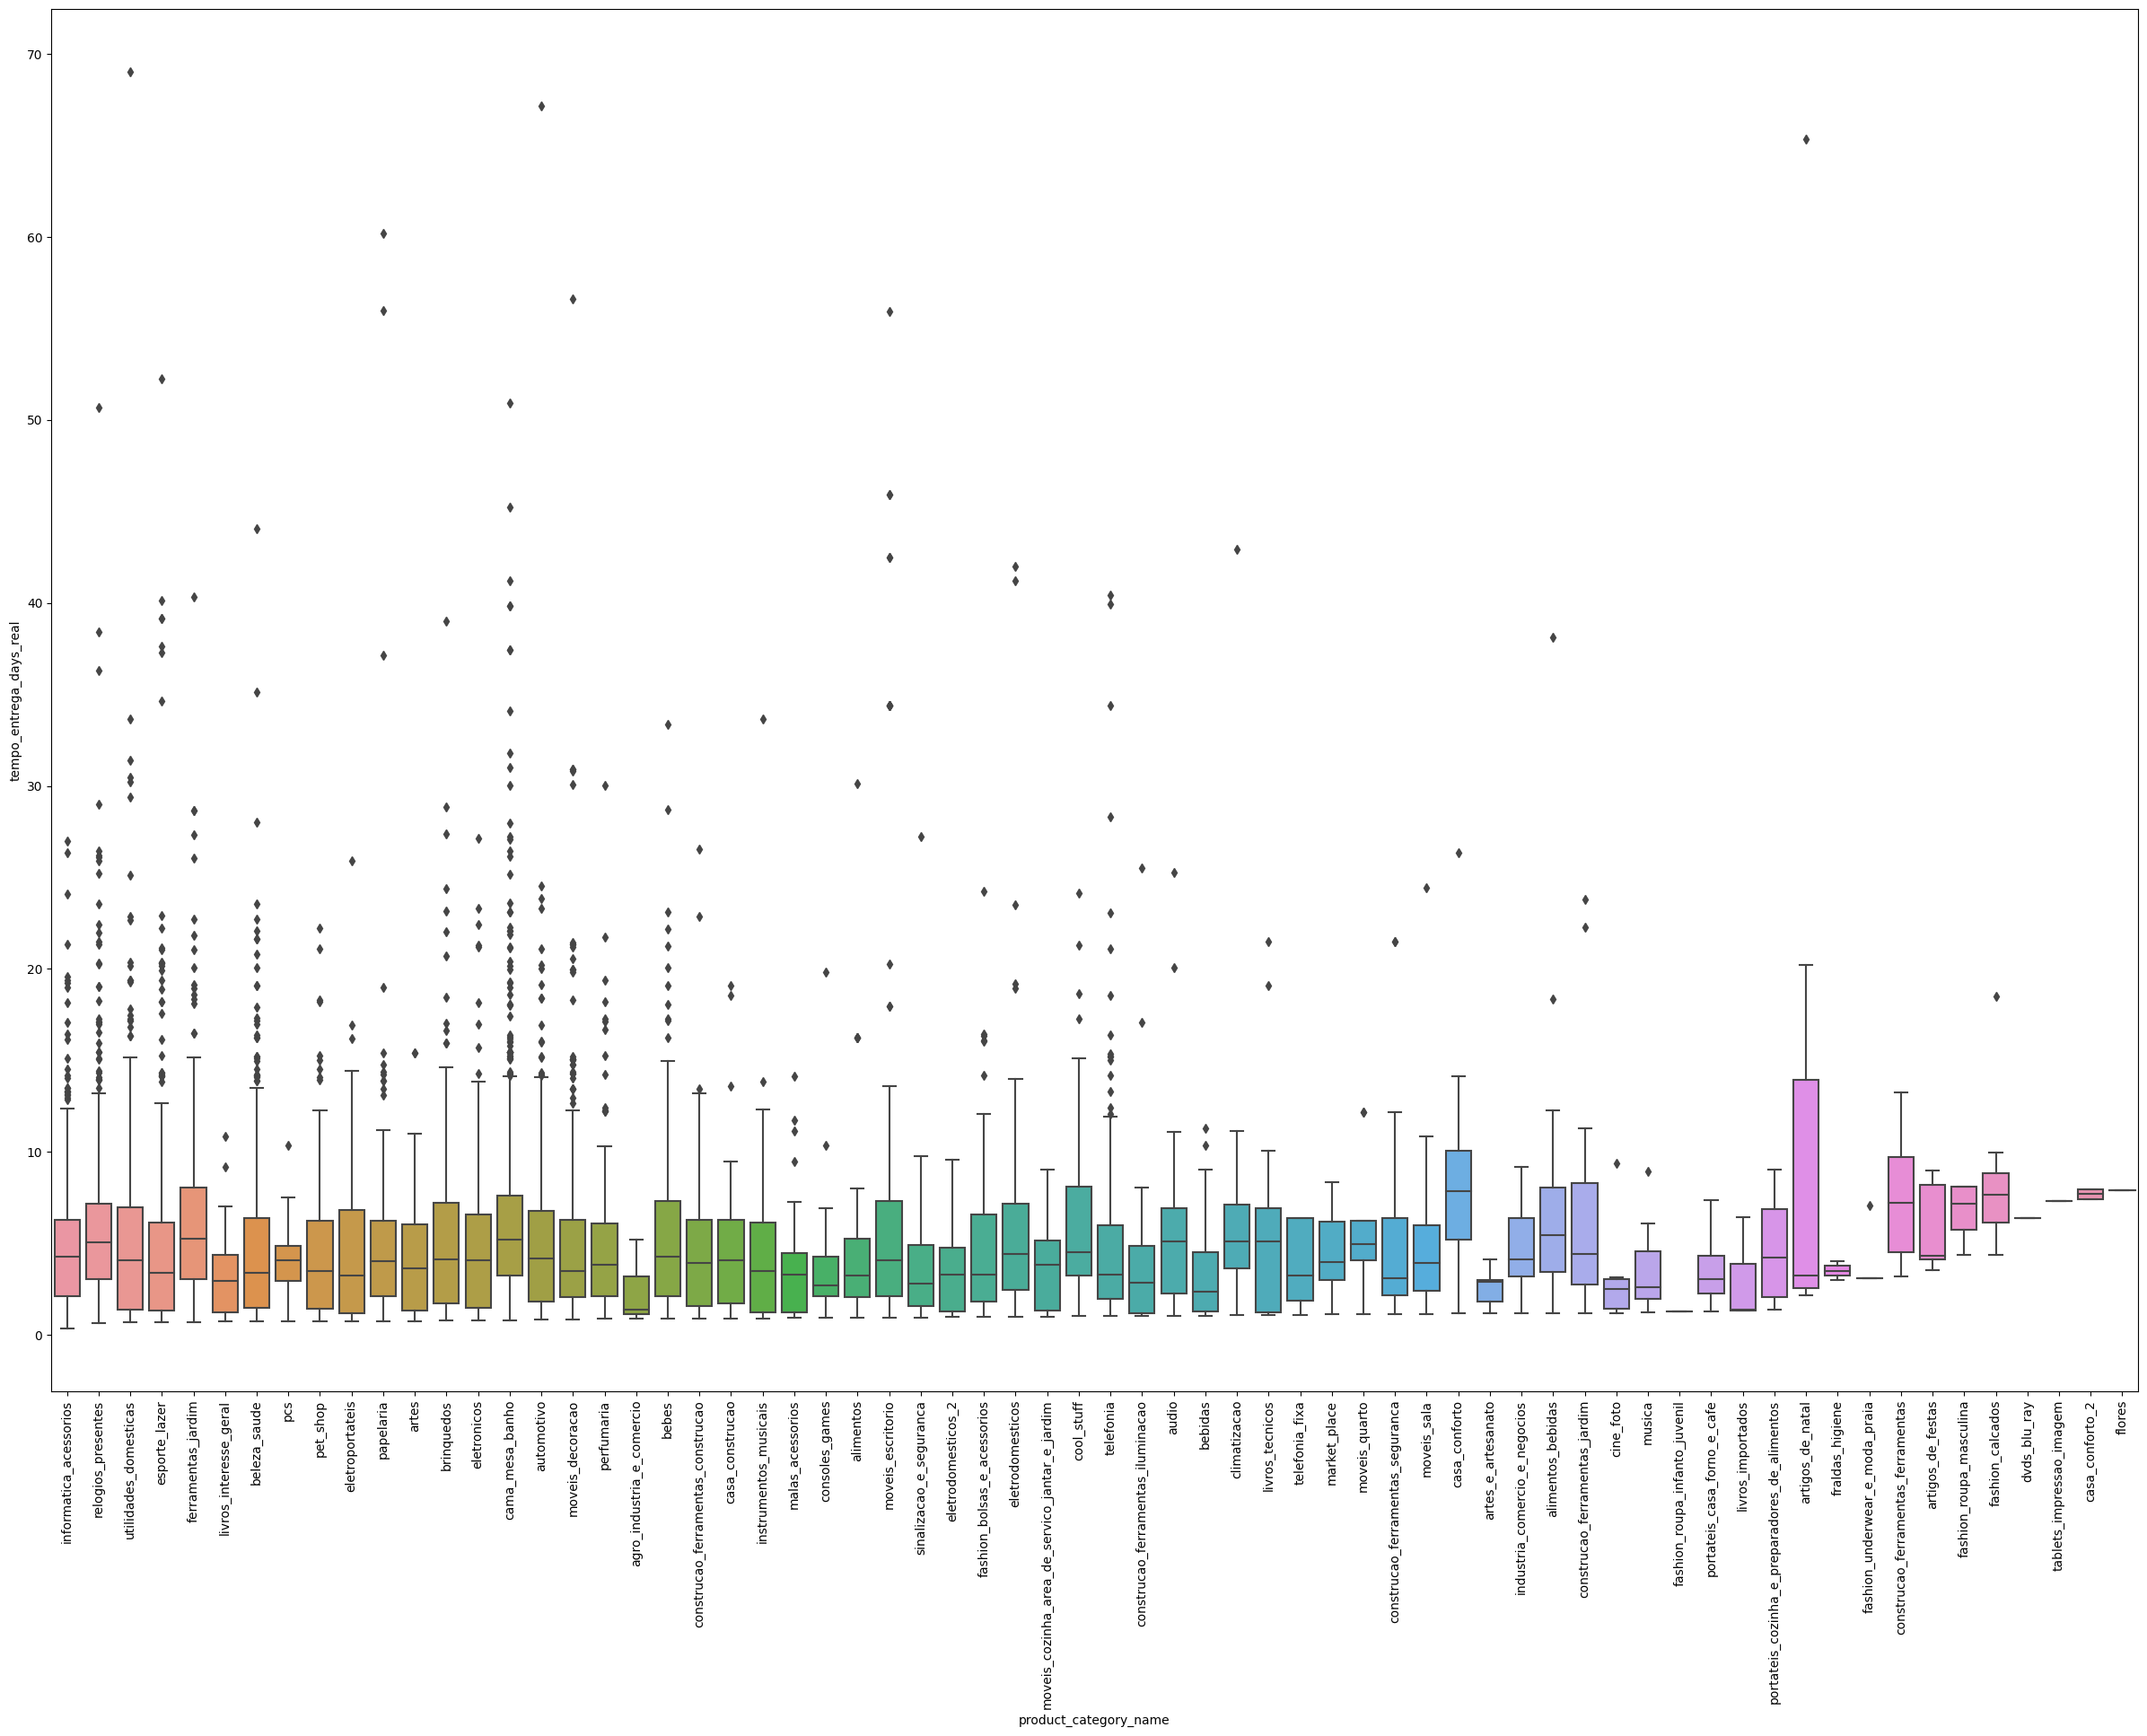

In [ ]:
df_dist_sorted = df_dist.sort_values("tempo_entrega_days_real")
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x="product_category_name", y="tempo_entrega_days_real", data=df_dist_sorted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

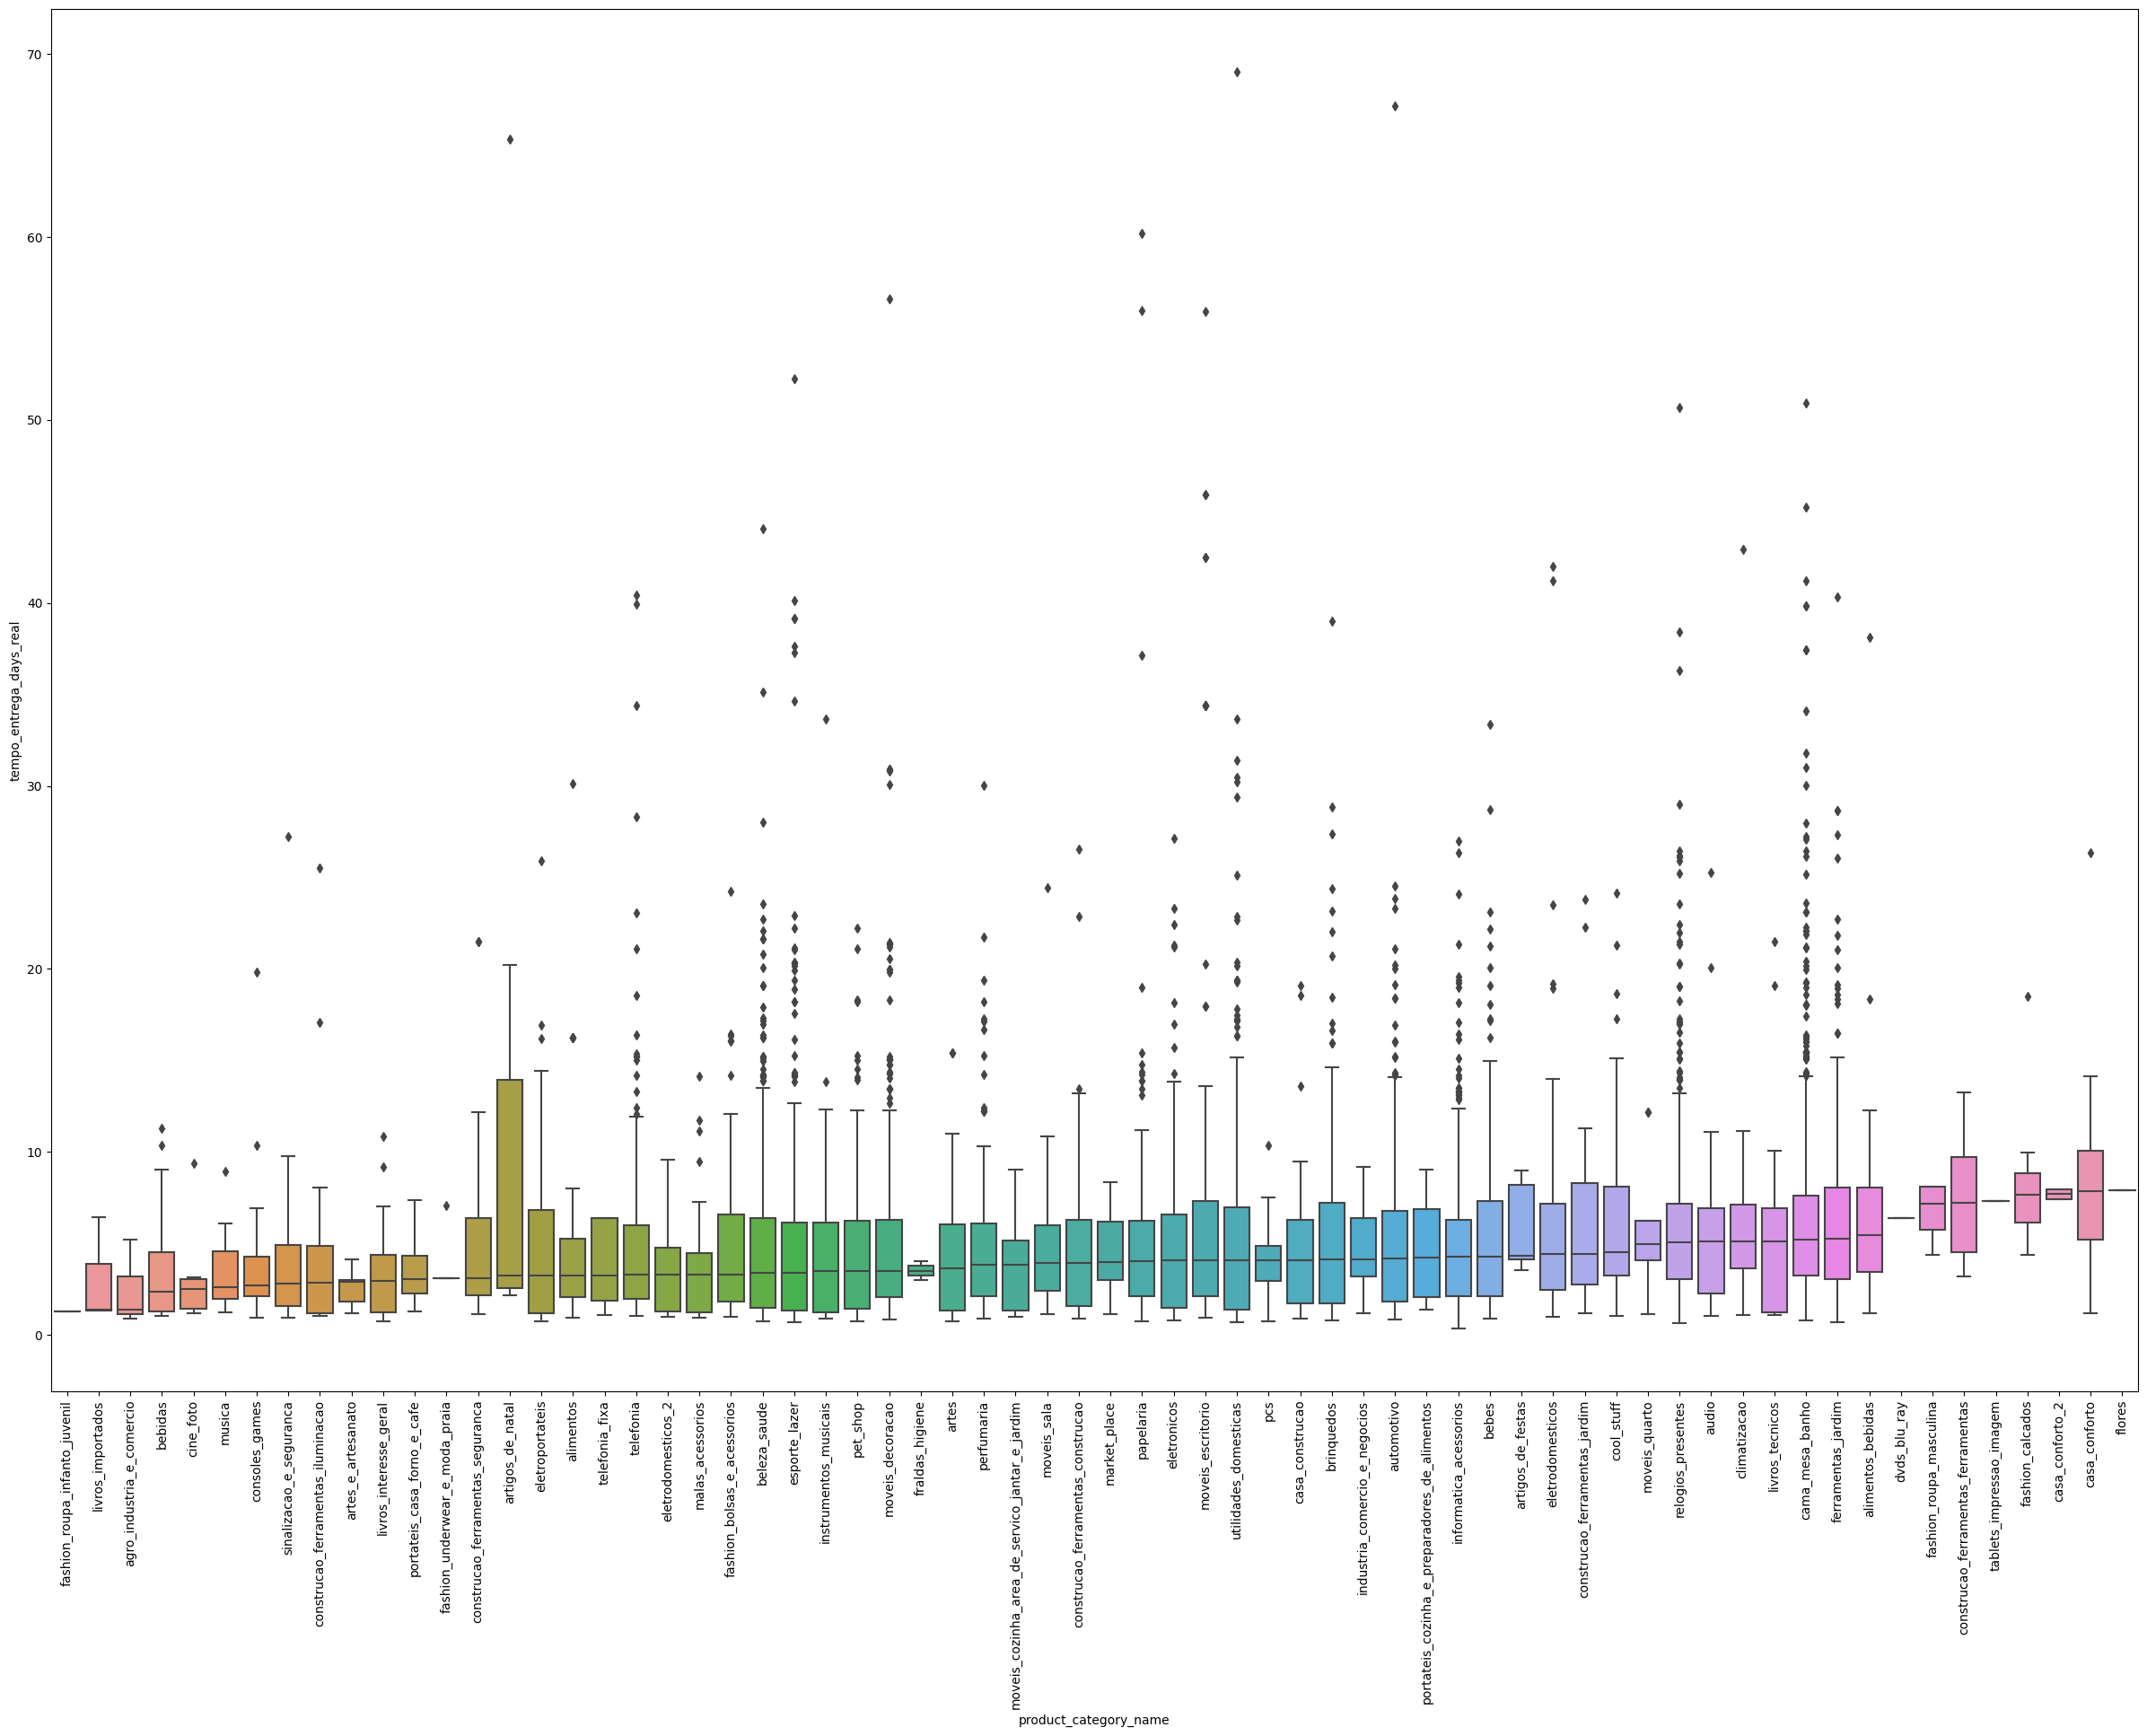

In [ ]:
# Calcula a média de tempo_entrega_days_real para cada categoria de produto
mean_tempo_entrega = df_dist.groupby("product_category_name")["tempo_entrega_days_real"].median()

# Ordena as médias em ordem crescente
mean_tempo_entrega_sorted = mean_tempo_entrega.sort_values()

# Cria o gráfico de caixa usando a coluna ordenada
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x="product_category_name", y="tempo_entrega_days_real", data=df_dist, order=mean_tempo_entrega_sorted.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
count_tempo_entrega = df_dist.groupby("product_category_name")["tempo_entrega_days_real"].count()

display(count_tempo_entrega)

product_category_name
agro_industria_e_comercio      5
alimentos                     44
alimentos_bebidas             17
artes                         42
artes_e_artesanato             6
                            ... 
sinalizacao_e_seguranca       22
tablets_impressao_imagem       1
telefonia                    217
telefonia_fixa                10
utilidades_domesticas        538
Name: tempo_entrega_days_real, Length: 66, dtype: int64

#Hot Encoding do mês e dia da semana

In [ ]:
df_dist = pd.concat([df_dist, pd.get_dummies(df_dist['Mes_Pedido'])], axis=1)
df_dist = pd.concat([df_dist, pd.get_dummies(df_dist['dia_da_semana'])], axis=1)

display(df_dist)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,...,geolocation_lng_seller,Distance,dia_da_semana,Dia_da_Semana,Mes_de_Aprovacao_do_Pedido,Categoria_Produto,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,...,-43.984727,400.466657,Thursday,3,08,Produtos de higiene pessoal e cuidados com a s...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,...,-43.984727,15.654501,Wednesday,2,07,Produtos de higiene pessoal e cuidados com a s...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,...,-43.984727,19.466840,Tuesday,1,08,Produtos de higiene pessoal e cuidados com a s...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,...,-43.984727,523.062446,Friday,4,07,Produtos de higiene pessoal e cuidados com a s...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-08 16:44:28,116.9,18.92,8e3caf3f5fc6e80bd9b973078bc59b8b,4.0,Bom,Chegou antes do prazo previsto.,2018-08-10 00:00:00,2018-08-10 23:39:06,...,-43.984727,400.466657,Monday,0,08,Produtos de higiene pessoal e cuidados com a s...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,c69e7e591d11462c6a11215e52c4329b,1c1e1532dcfb2dba978d8f91fef9484f,delivered,2018-06-17 22:05:56,2018-06-17 22:32:30,2018-06-19 13:48:00,2018-06-22 17:32:30,2018-07-05,June,3 days 03:

#Dias Úteis

In [ ]:
%pip install pandas_market_calendars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 10.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import holidays
from datetime import datetime
import calendar

br_holidays = holidays.Brazil()

df_dist["total_dias_uteis"] = 0

def count_business_days(date):
    year = date.year
    month = date.month
    last_day = calendar.monthrange(year, month)[1]
    days = pd.date_range(start=f'{year}-{month}-01', end=f'{year}-{month}-{last_day}', freq='B')
    holidays_count = len([d for d in days if (d.weekday() not in [5, 6]) and (d not in br_holidays)])
    return holidays_count

df_dist["total_dias_uteis"] = df_dist["order_approved_at"].apply(count_business_days)

display(df_dist)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Mes_Pedido,tempo_entrega_real,tempo_entrega_days_real,tempo_entrega_estimado,tempo_entrega_days_estimado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,...,Distance,dia_da_semana,Dia_da_Semana,Mes_de_Aprovacao_do_Pedido,Categoria_Produto,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,total_dias_uteis
0,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,August,4 days 04:17:47,4.179016,11 days 09:26:00,11.393056,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5.0,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50,...,400.466657,Thursday,3,08,Produtos de higiene pessoal e cuidados com a s...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,23
1,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,July,1 days 03:13:35,1.134433,6 days 08:59:00,6.374306,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,7a48dff7ae9e5a6d9187517daa9d9908,5.0,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39,...,15.654501,Wednesday,2,07,Produtos de higiene pessoal e cuidados com a s...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,22
2,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,August,0 days 23:49:57,0.993021,-4 days +08:41:00,-3.638194,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,999ce675f2f793a2360d9809a2b37252,4.0,Bom,Chegou atrasado mas está valendo,2018-08-15 00:00:00,2018-08-17 05:10:54,...,19.466840,Tuesday,1,08,Produtos de higiene pessoal e cuidados com a s...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,23
3,4e16f71b2a5ddc0266f9ddfdfd0bcfba,0e6c54c40385920c74542f153754aca6,delivered,2018-07-22 18:58:10,2018-07-27 23:30:54,2018-07-24 15:09:00,2018-07-27 16:46:38,2018-08-06,July,3 days 01:37:38,3.067801,12 days 08:51:00,12.368750,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-26 06:05:30,118.7,15.93,f07db014a097bea9fe8a8b66d4e3e531,5.0,Satisfação do Cliente,"Muito bom, recomendo, tudo dentro do prazo!!!",2018-08-01 00:00:00,2018-08-04 18:24:21,...,523.062446,Friday,4,07,Produtos de higiene pessoal e cuidados com a s...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,22
4,706617489351ee37878ad03403622f41,52c3ac2dfd7f5cf22a3c521ef11dafc7,delivered,2018-08-06 16:29:44,2018-08-06 16:44:28,2018-08-07 15:24:00,2018-08-09 20:24:27,2018-08-17,August,2 days 05:00:27,2.208646,9 days 08:36:00,9.358333,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-08 16:44:28,116.9,18.92,8e3caf3f5fc6e80bd9b973078bc59b8b,4.0,Bom,Chegou antes do prazo previsto.,2018-08-10 00:00:00,2018-08-10 23:39:06,...,400.466657,Monday,0,08,Produtos de higiene pessoal e cuidados com a s...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,c69e7e591d11462c6a11215e52c4329b,1c1e1532dcfb2dba978d8f91fef9484f,delivered,2018-06-17 22:05:56,2018-06-17 22:32:30,2018-06-19 13:48:00,2018-06-22 17:32:30,2018-07-05,June,3 days 03:44:30,3.155903,15 days 10:12:00,15.425000,1.0,

#Selecionando Colunas Necessárias

In [ ]:
df_final = df_dist[['tempo_entrega_days_real', 'order_item_id', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'Distance', 'total_dias_uteis', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

display(df_final)

,tempo_entrega_days_real,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Distance,total_dias_uteis,January,February,March,April,May,June,July,August,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,4.179016,1.0,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1.134433,1.0,118.7,9.34,400.0,19.0,13.0,19.0,15.654501,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.993021,1.0,116.9,9.33,400.0,19.0,13.0,19.0,19.466840,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,3.067801,1.0,118.7,15.93,400.0,19.0,13.0,19.0,523.062446,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2.208646,1.0,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,3.155903,1.0,99.0,22.51,5750.0,30.0,30.0,30.0,183.018773,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7735,4.297674,1.0,57.2,12.84,150.0,22.0,3.0,15.0,134.240374,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7736,7.328889,1.0,159.9,13.78,245.0,26.0,8.0,17.0,339.125166,22,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7737,11.355266,1.0,129.9,13.35,150.0,16.0,11.0,11.0,123.276953,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Indentificando os outliers com a função LOF (Local Outlier Factor)

In [ ]:
df_lof = df_final

In [ ]:
lof = LocalOutlierFactor(n_neighbors=700)
predicao_lof = lof.fit_predict(df_lof)
aux_lof = pd.Series(predicao_lof)
aux_lof.value_counts()

 1    6106
-1     508
dtype: int64

In [ ]:
df_lof['lof_scores'] = predicao_lof

display(df_lof)

<ipython-input-55-0a53b573738f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof['lof_scores'] = predicao_lof


,tempo_entrega_days_real,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Distance,total_dias_uteis,January,February,March,April,May,June,July,August,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,lof_scores
0,4.179016,1.0,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1.134433,1.0,118.7,9.34,400.0,19.0,13.0,19.0,15.654501,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.993021,1.0,116.9,9.33,400.0,19.0,13.0,19.0,19.466840,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,3.067801,1.0,118.7,15.93,400.0,19.0,13.0,19.0,523.062446,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2.208646,1.0,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,3.155903,1.0,99.0,22.51,5750.0,30.0,30.0,30.0,183.018773,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7735,4.297674,1.0,57.2,12.84,150.0,22.0,3.0,15.0,134.240374,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7736,7.328889,1.0,159.9,13.78,245.0,26.0,8.0,17.0,339.125166,22,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7737,11.355266,1.0,129.9,13.35,150.0,16.0,11.0,11.0,123.276953,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_lof = df_lof.drop(df_lof.loc[df_lof["lof_scores"] ==-1].index)
df_lof = df_lof[['tempo_entrega_days_real', 'order_item_id', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'Distance', 'total_dias_uteis', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
display(df_lof)

,tempo_entrega_days_real,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Distance,total_dias_uteis,January,February,March,April,May,June,July,August,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,4.179016,1.0,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1.134433,1.0,118.7,9.34,400.0,19.0,13.0,19.0,15.654501,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.993021,1.0,116.9,9.33,400.0,19.0,13.0,19.0,19.466840,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,3.067801,1.0,118.7,15.93,400.0,19.0,13.0,19.0,523.062446,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2.208646,1.0,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,3.155903,1.0,99.0,22.51,5750.0,30.0,30.0,30.0,183.018773,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7735,4.297674,1.0,57.2,12.84,150.0,22.0,3.0,15.0,134.240374,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7736,7.328889,1.0,159.9,13.78,245.0,26.0,8.0,17.0,339.125166,22,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7737,11.355266,1.0,129.9,13.35,150.0,16.0,11.0,11.0,123.276953,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Escrevendo no google drive o CSV com os dados tratados

In [ ]:
df_lof.to_csv('/content/gdrive/MyDrive/Base de dados/Base_Tratada_Selecionada_lof.csv', index=False)

In [ ]:
df_final.to_csv('/content/gdrive/MyDrive/Base de dados/Base_Tratada_Selecionada.csv', index=False)

In [ ]:
df_dist.to_csv('/content/gdrive/MyDrive/Base de dados/Base_Tratada_Completa.csv', index=False)

#Testes

Inspecionando o dado

In [ ]:
#sns.pairplot(df_final, y_vars=df_final['tempo_entrega_days_real'])

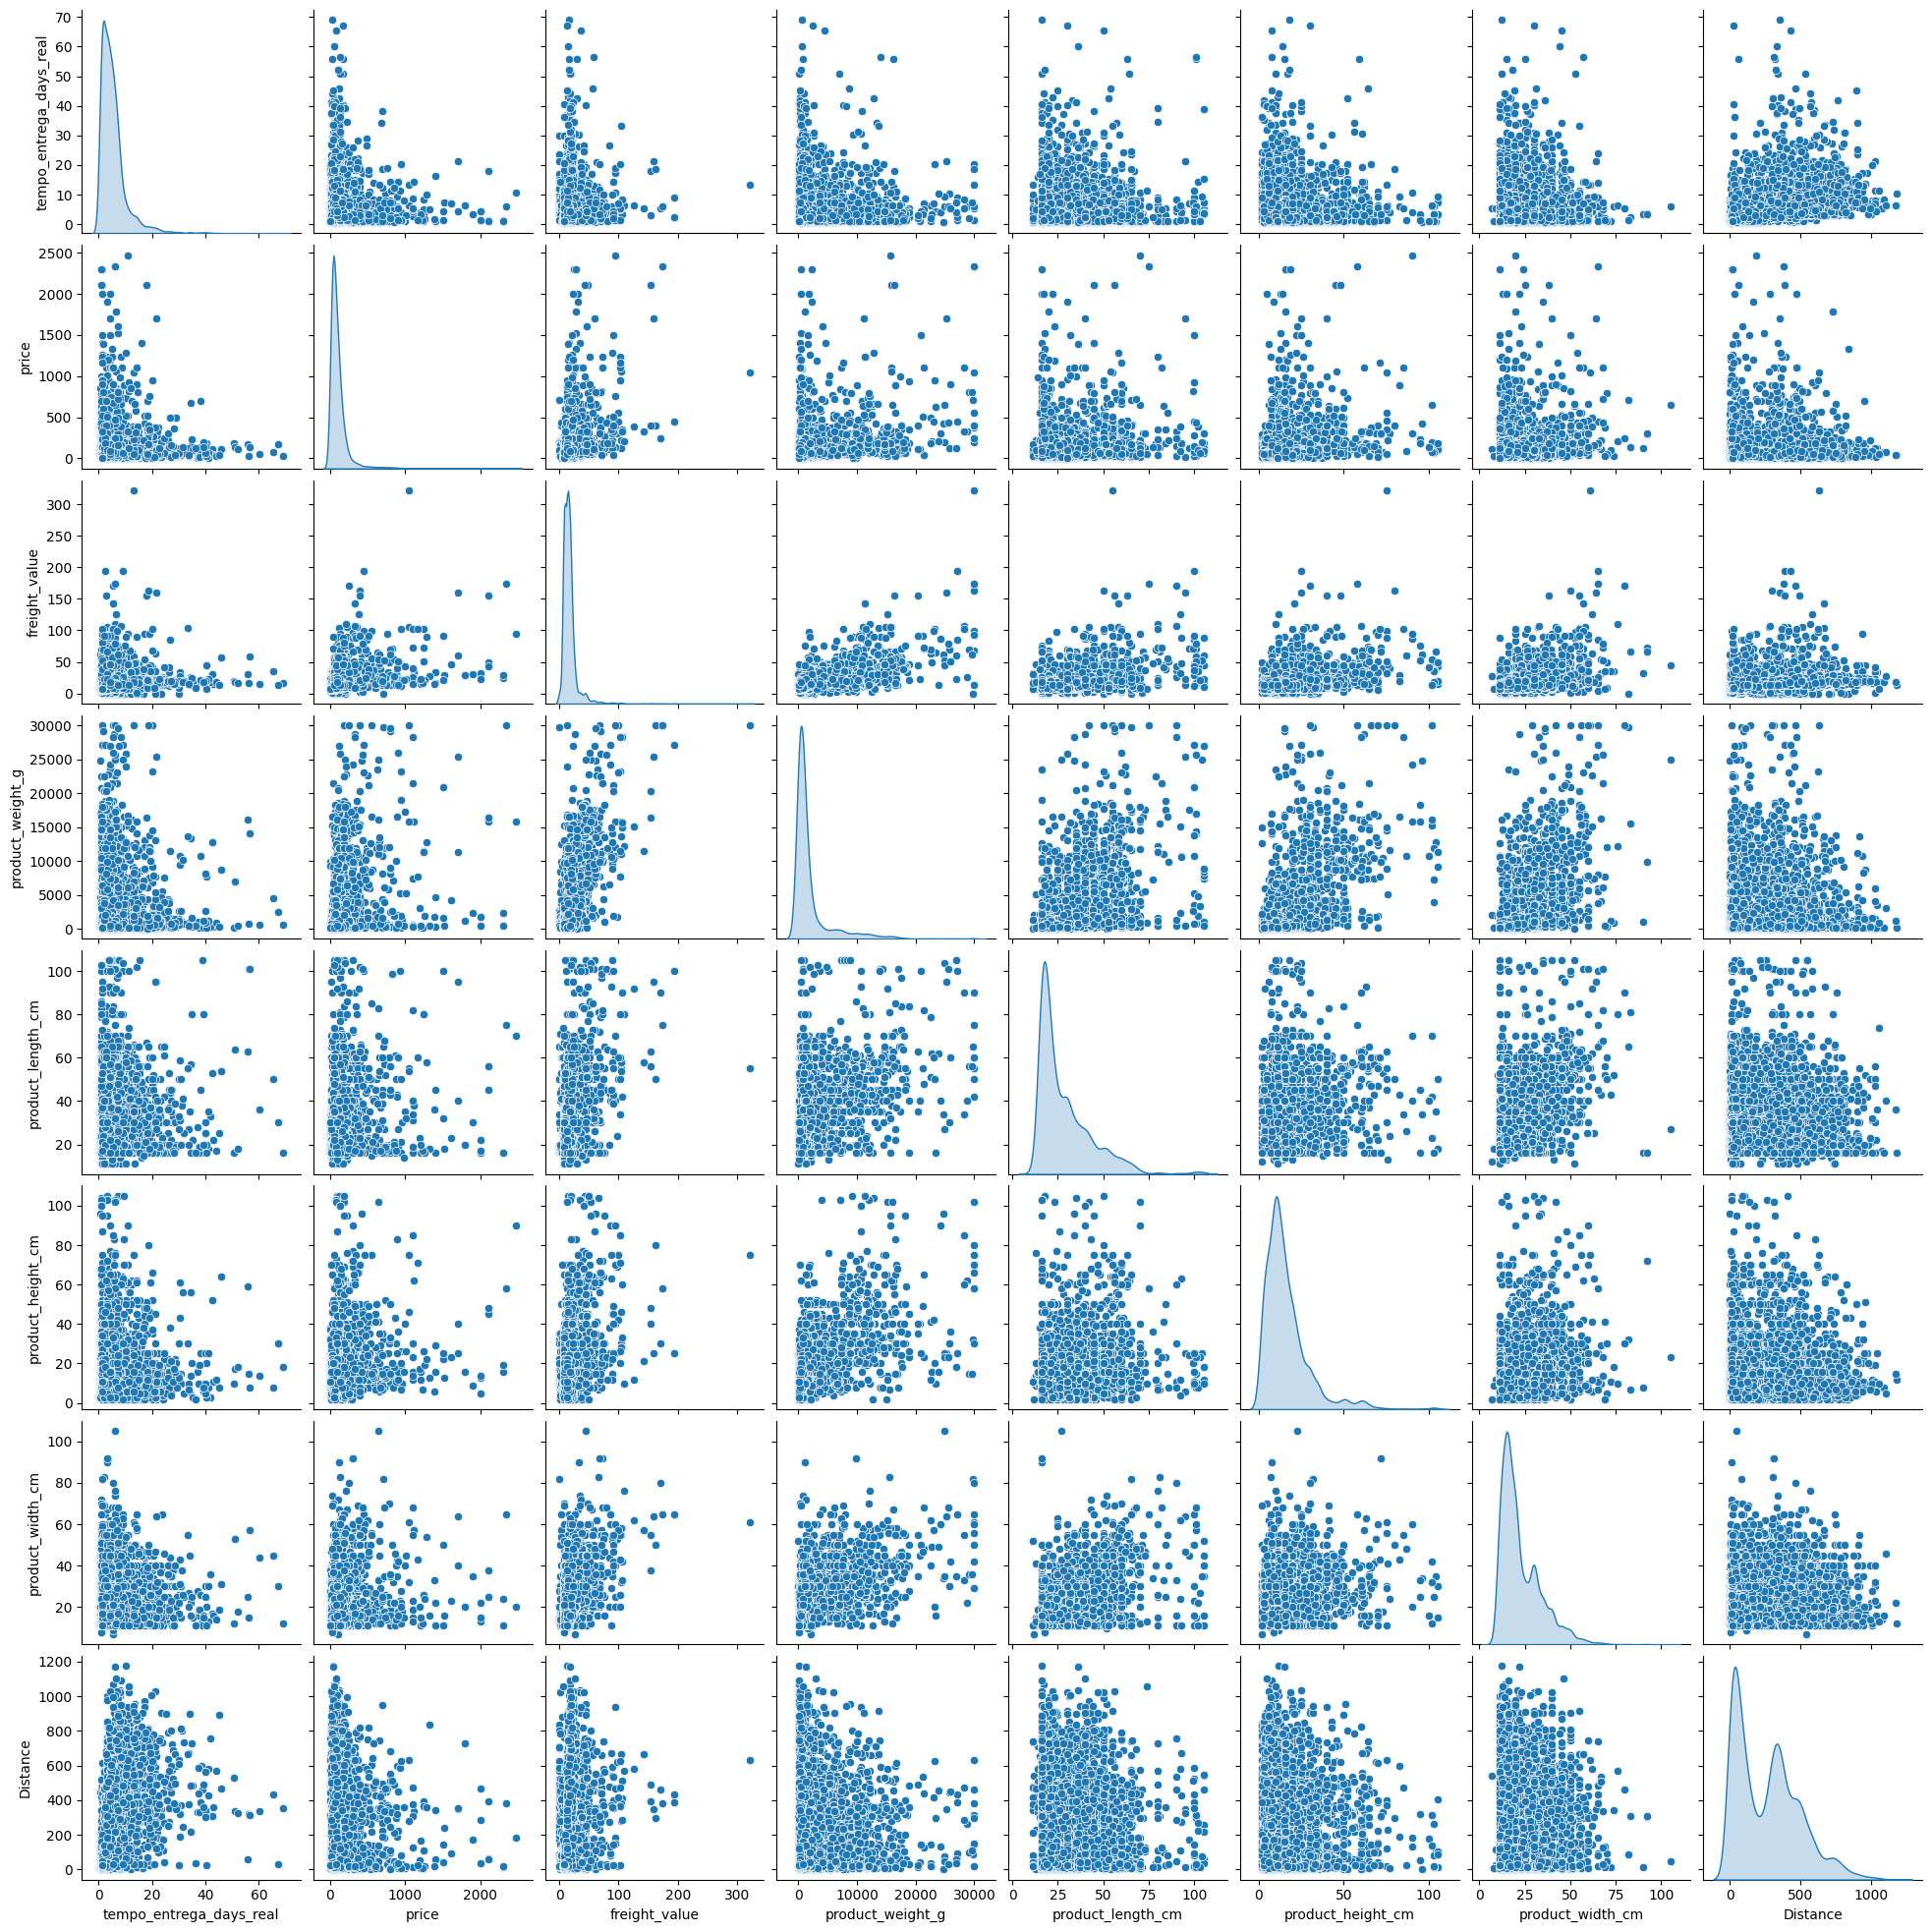

In [ ]:
sns.pairplot(df_dist[['tempo_entrega_days_real', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'Distance']], diag_kind='kde')

Analisando estatisticas gerais dos dados

In [ ]:
est_treino = df_dist.describe()
est_treino.pop('tempo_entrega_days_real')
est_treino = est_treino.transpose()
est_treino

,count,mean,std,min,25%,50%,75%,max
tempo_entrega_real,6614,5 days 12:11:02.104777744,5 days 13:10:31.401965843,0 days 08:19:53,2 days 02:51:07.250000,4 days 05:03:23,6 days 21:15:53.500000,69 days 00:39:23
tempo_entrega_estimado,6614,16 days 15:07:27.234804959,9 days 15:00:04.459844708,-17 days +08:26:00,9 days 11:57:00,15 days 09:29:00,21 days 15:46:00,62 days 07:57:00
tempo_entrega_days_estimado,6614.0,16.630176,9.625052,-16.648611,9.497917,15.395139,21.656944,62.33125
order_item_id,6614.0,1.263834,0.796808,1.0,1.0,1.0,1.0,13.0
price,6614.0,111.986935,168.704356,0.85,37.0,69.9,123.75,2470.5
freight_value,6614.0,16.854291,13.426538,0.0,9.1,14.51,18.97,321.88
review_score,6614.0,3.83792,1.548756,1.0,3.0,5.0,5.0,5.0
product_name_lenght,6614.0,48.939673,9.968823,8.0,43.0,52.0,57.0,64.0
product_description_lenght,6614.0,779.518143,641.711262,4.0,348.0,605.0,971.0,3956.0
product_photos_qty,6614.0,2.198669,1.724699,1.0,1.0,1.0,3.0,17.0


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_dist["tempo_entrega_days_real"], df_dist["tempo_entrega_days_estimado"])

print("MSE: ", mse)

MSE:  210.88392782855794


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(df_dist["tempo_entrega_days_real"], df_dist["tempo_entrega_days_estimado"])

print("R2: ", r2)

R2:  -5.849891341070099


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

Erro_medio_percentual = mean_absolute_percentage_error(df_dist["tempo_entrega_days_real"], df_dist["tempo_entrega_days_estimado"])

print("MAPE: ", Erro_medio_percentual)

MAPE:  3.860405850902392


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_dist['tempo_entrega_days_real'], df_dist['tempo_entrega_days_estimado'])

print('MAE:', mae)

MAE: 12.001119097817199


In [ ]:
df_dist["tempo_entrega_days_real"].mean()

5.50766324974241

In [ ]:
df_dist["tempo_entrega_days_estimado"].mean()

16.6301763287611

In [ ]:
# # Criar gráfico de linhas com a média das colunas tempo_entrega_days_real e tempo_entrega_days_estimado
# plt.plot(df_dist['Mes_Pedido'], df_dist['tempo_entrega_days_real'].mean(axis=1), label='Tempo de Entrega Real')
# plt.plot(df_dist['Mes_Pedido'], df_dist['tempo_entrega_days_estimado'].mean(axis=1), label='Tempo de Entrega Estimado')

# # Adicionar rótulos e título ao gráfico
# plt.xlabel('Mes_Pedido')
# plt.ylabel('Tempo de Entrega (Média)')
# plt.title('Média do Tempo de Entrega Real e Estimado ao Longo do Tempo')

# # Adicionar legenda
# plt.legend()

# # Exibir o gráfico
# plt.show()

Usar o erro médio %

#Teste

In [ ]:
df_teste = df_dist[['product_category_name','tempo_entrega_days_real', 'price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'Distance', 'total_dias_uteis', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]


In [ ]:
df_teste['lof_scores'] = predicao_lof

display(df_teste)

<ipython-input-69-d59524041f39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['lof_scores'] = predicao_lof


,product_category_name,tempo_entrega_days_real,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Distance,total_dias_uteis,January,February,March,April,May,June,July,August,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,lof_scores
0,perfumaria,4.179016,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,perfumaria,1.134433,118.7,9.34,400.0,19.0,13.0,19.0,15.654501,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,perfumaria,0.993021,116.9,9.33,400.0,19.0,13.0,19.0,19.466840,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,perfumaria,3.067801,118.7,15.93,400.0,19.0,13.0,19.0,523.062446,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,perfumaria,2.208646,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,pet_shop,3.155903,99.0,22.51,5750.0,30.0,30.0,30.0,183.018773,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7735,automotivo,4.297674,57.2,12.84,150.0,22.0,3.0,15.0,134.240374,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7736,utilidades_domesticas,7.328889,159.9,13.78,245.0,26.0,8.0,17.0,339.125166,22,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7737,beleza_saude,11.355266,129.9,13.35,150.0,16.0,11.0,11.0,123.276953,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_teste = df_teste.drop(df_teste.loc[df_teste["lof_scores"] ==-1].index)
display(df_teste)

,product_category_name,tempo_entrega_days_real,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Distance,total_dias_uteis,January,February,March,April,May,June,July,August,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,lof_scores
0,perfumaria,4.179016,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,perfumaria,1.134433,118.7,9.34,400.0,19.0,13.0,19.0,15.654501,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,perfumaria,0.993021,116.9,9.33,400.0,19.0,13.0,19.0,19.466840,23,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,perfumaria,3.067801,118.7,15.93,400.0,19.0,13.0,19.0,523.062446,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,perfumaria,2.208646,116.9,18.92,400.0,19.0,13.0,19.0,400.466657,23,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,pet_shop,3.155903,99.0,22.51,5750.0,30.0,30.0,30.0,183.018773,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7735,automotivo,4.297674,57.2,12.84,150.0,22.0,3.0,15.0,134.240374,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7736,utilidades_domesticas,7.328889,159.9,13.78,245.0,26.0,8.0,17.0,339.125166,22,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7737,beleza_saude,11.355266,129.9,13.35,150.0,16.0,11.0,11.0,123.276953,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


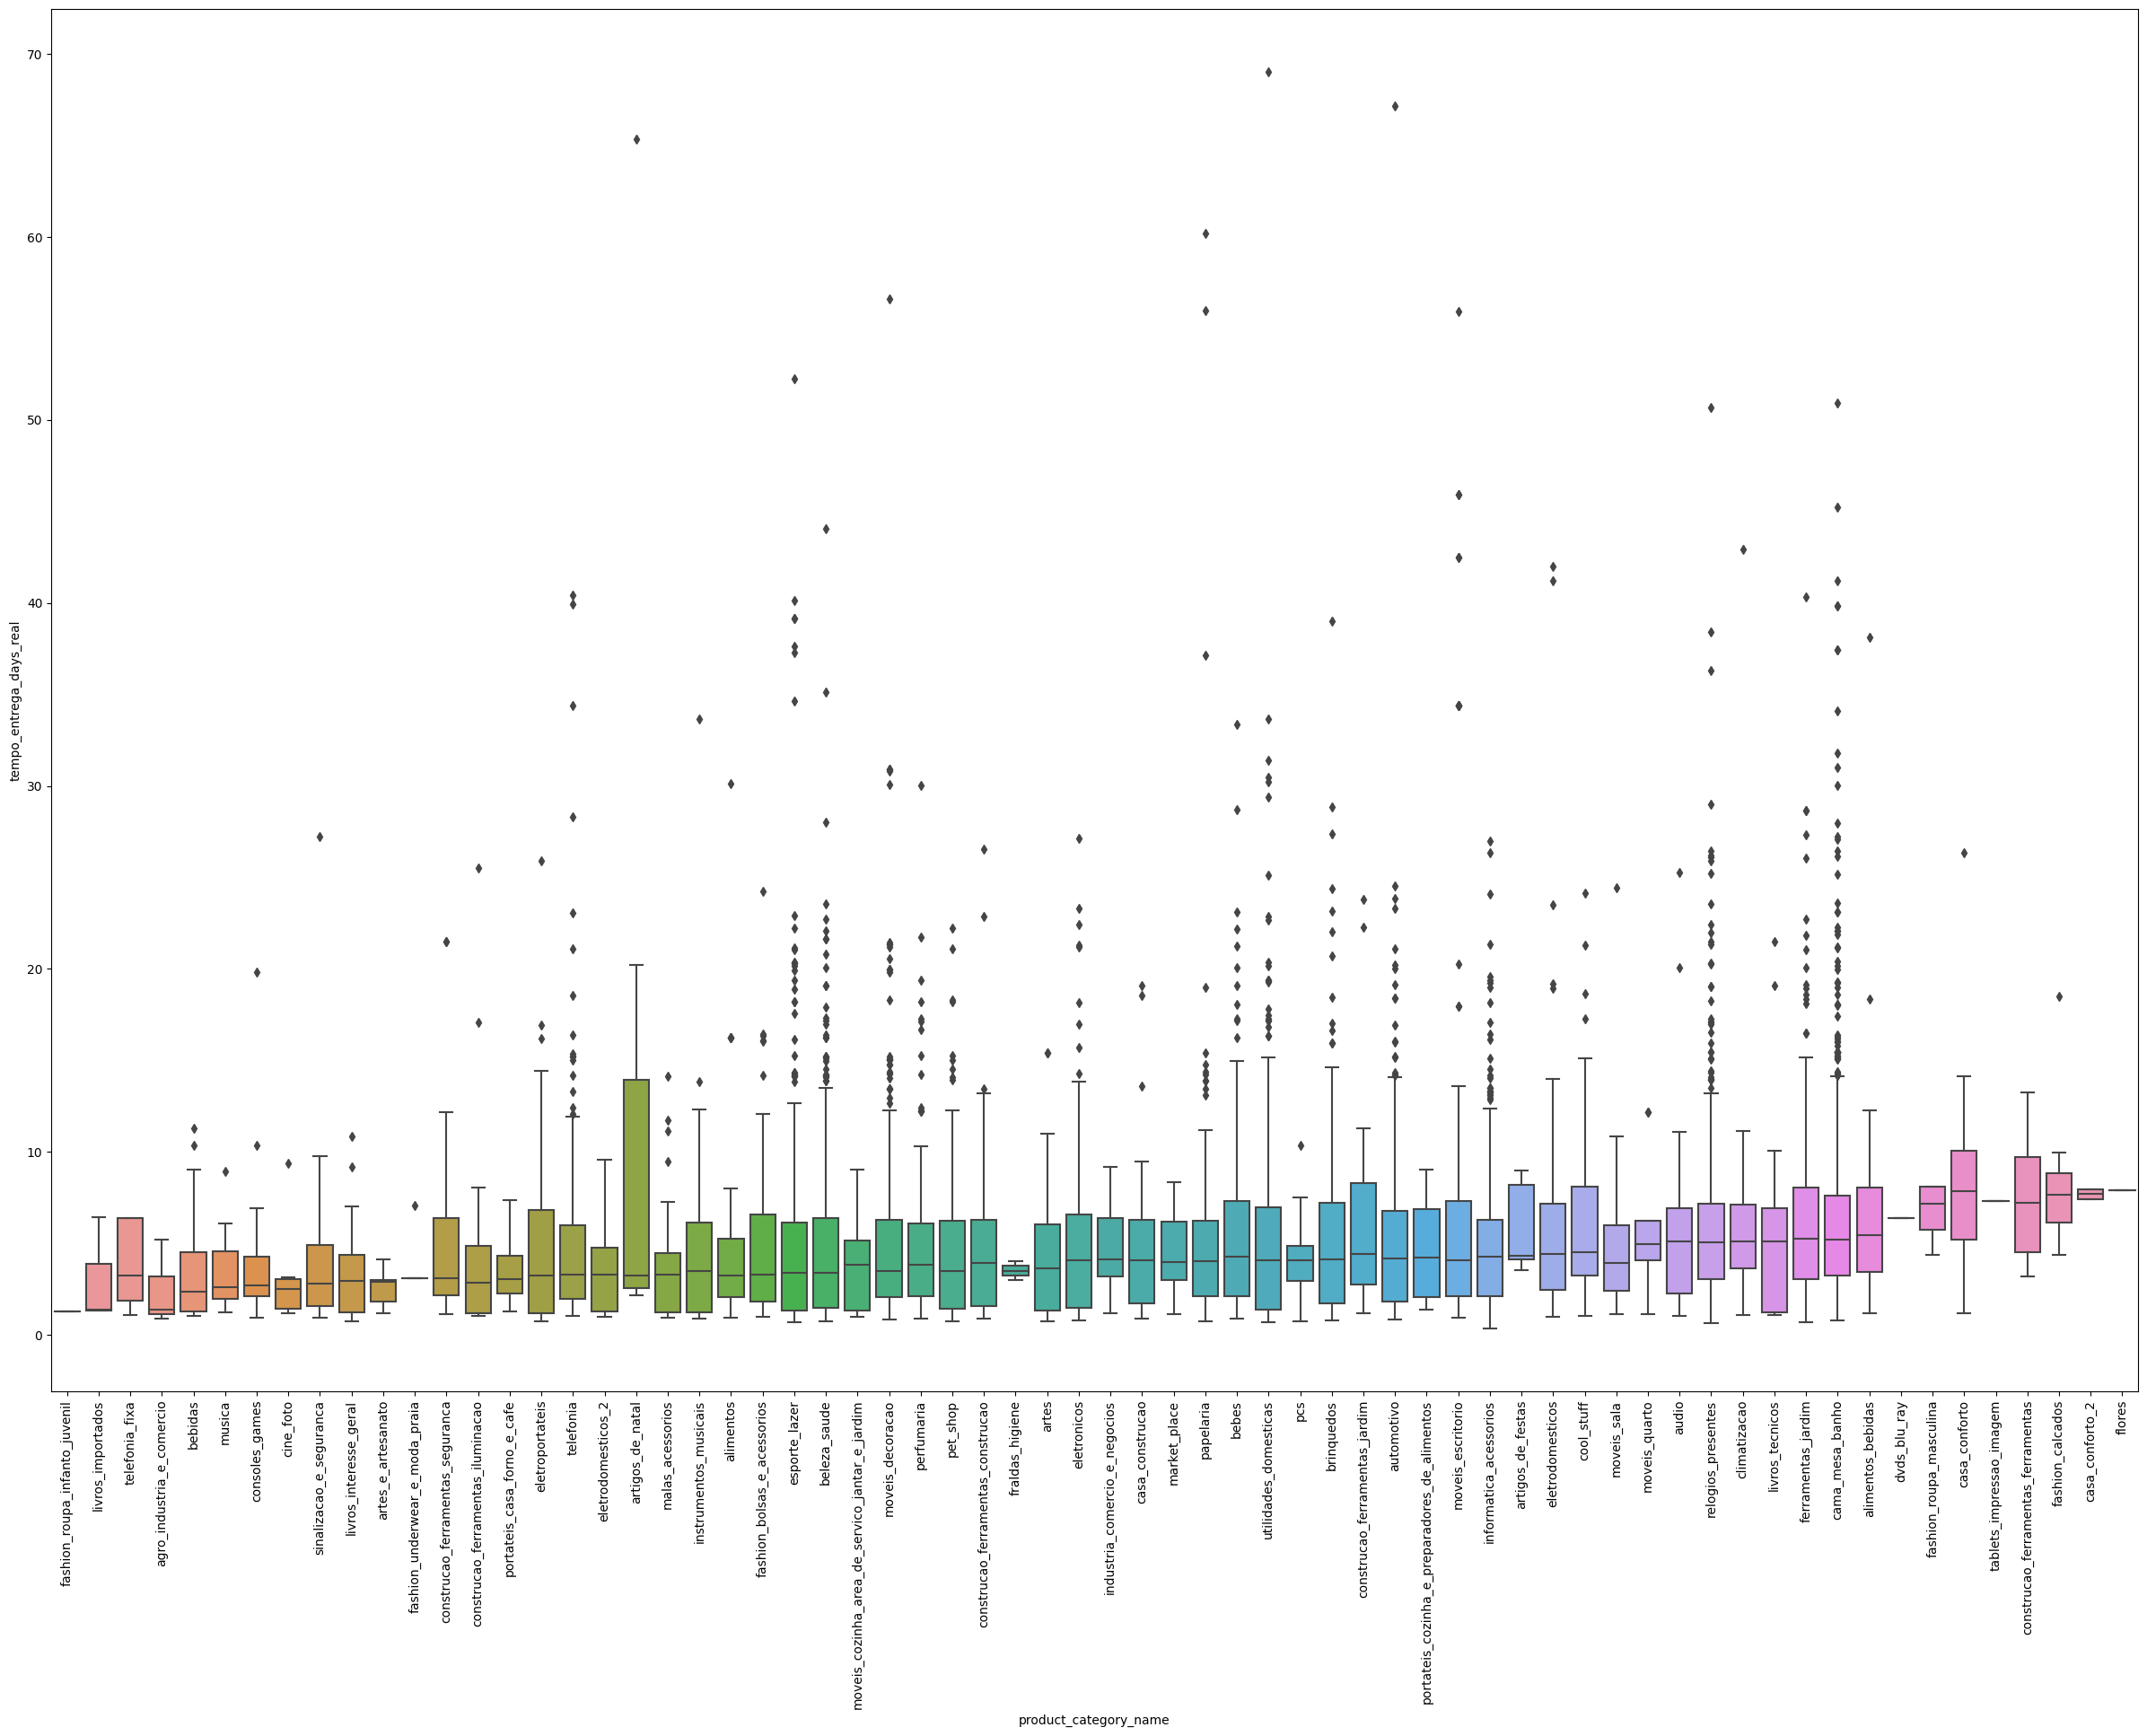

In [ ]:
# Calcula a média de tempo_entrega_days_real para cada categoria de produto
mean_tempo_entrega = df_teste.groupby("product_category_name")["tempo_entrega_days_real"].median()

# Ordena as médias em ordem crescente
mean_tempo_entrega_sorted = mean_tempo_entrega.sort_values()

# Cria o gráfico de caixa usando a coluna ordenada
fig, ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x="product_category_name", y="tempo_entrega_days_real", data=df_dist, order=mean_tempo_entrega_sorted.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()